In [42]:
import tensorflow
import sklearn
from pathlib import Path
import librosa
import numpy
import scipy
import matplotlib.pyplot as plt
import IPython

from tensorflow import keras

In [26]:
kickSamples = numpy.array([librosa.load('audio\Kick\RGRS_KICK_HDFL_HT_01.wav'),
               librosa.load('audio\Kick\RGRS_KICK_HDFL_HT_02.wav'),
               librosa.load('audio\Kick\RGRS_KICK_HDFL_HT_03.wav'),
               librosa.load('audio\Kick\RGRS_KICK_SFFL_HT_01.wav'),
               librosa.load('audio\Kick\RGRS_KICK_SFFL_HT_02.wav')])


snareSamples = numpy.array([librosa.load('audio\Snare\L400_SNR_DCFL_HT_01.wav'),
                librosa.load('audio\Snare\L400_SNR_DCFL_HT_02.wav'),
                librosa.load('audio\Snare\L400_SNR_DCFL_HT_03.wav'),
                librosa.load('audio\Snare\L400_SNR_DEFL_HT_01.wav'),
                librosa.load('audio\Snare\L400_SNR_DEFL_HT_02.wav'),
                librosa.load('audio\Snare\L400_SNR_DEFL_HT_03.wav'),
                librosa.load('audio\Snare\L400_SNR_LCFL_HT_01.wav'),
                librosa.load('audio\Snare\L400_SNR_LCFL_HT_02.wav'),
                librosa.load('audio\Snare\L400_SNR_LCFL_HT_03.wav'),
                librosa.load('audio\Snare\L400_SNR_LEFL_HT_01.wav'),
                librosa.load('audio\Snare\L400_SNR_LEFL_HT_02.wav')])              


In [27]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0,0],#Zero Crossing Rate
        librosa.feature.spectral_centroid(signal)[0,0], #center freq
        librosa.feature.tonnetz(signal)[0,0] #tonal centroid features
    ]

In [28]:
kickFeat = numpy.array([extract_features(x[0]) for x in kickSamples])
snareFeat = numpy.array([extract_features(x[0]) for x in snareSamples])

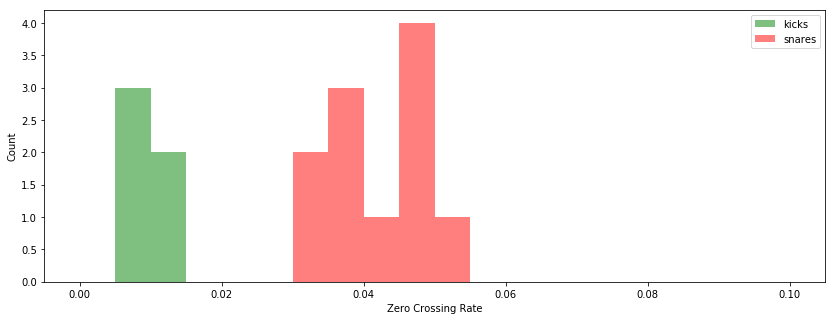

In [29]:
plt.figure(figsize=(14, 5))
plt.hist(kickFeat[:,0], color='g', range=(0, 0.1), alpha=0.5, bins=20)
plt.hist(snareFeat[:,0], color='r', range=(0, 0.1), alpha=0.5, bins=20)
plt.legend(('kicks', 'snares'));
plt.xlabel('Zero Crossing Rate');
plt.ylabel('Count');

Text(0, 0.5, 'Count')

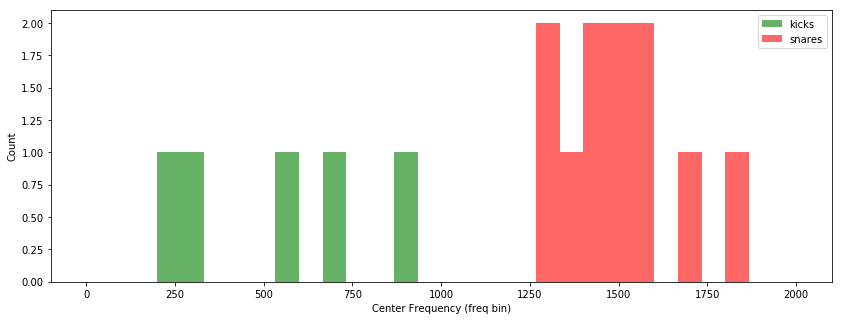

In [30]:
plt.figure(figsize=(14, 5))
plt.hist(kickFeat[:,1], color='g', range=(0, 2000), bins=30, alpha=0.6)
plt.hist(snareFeat[:,1], color='r', range=(0, 2000), bins=30, alpha=0.6)
plt.legend(('kicks', 'snares'))
plt.xlabel('Center Frequency (freq bin)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

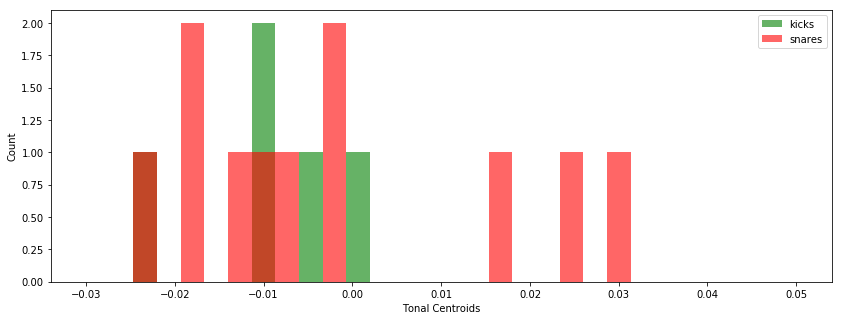

In [31]:
plt.figure(figsize=(14, 5))
plt.hist(kickFeat[:,2], color='g', range=(-.03, .05), bins=30, alpha=0.6)
plt.hist(snareFeat[:,2], color='r', range=(-.03, .05), bins=30, alpha=0.6)
plt.legend(('kicks', 'snares'))
plt.xlabel('Tonal Centroids')
plt.ylabel('Count')

In [32]:
feature_table = numpy.vstack((kickFeat, snareFeat))
print(feature_table.shape)


(16, 3)


In [33]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1. -1.]
[1. 1. 1.]


Text(0, 0.5, 'Tonal Centroid')

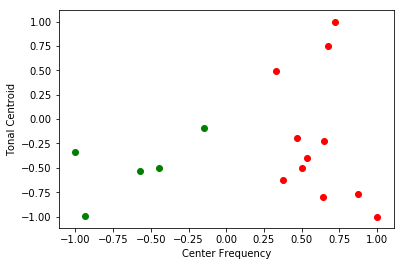

In [34]:
plt.scatter(training_features[:5,1], training_features[:5,2], c='g') #kick
plt.scatter(training_features[5:,1], training_features[5:,2], c='r') #snare

plt.xlabel('Center Frequency')
plt.ylabel('Tonal Centroid')

In [35]:
a, sr = librosa.load('audio\simpleloop.wav')

In [36]:
a_onset = librosa.onset.onset_detect(a)

In [37]:
a_os_sec = librosa.frames_to_time(a_onset)

In [38]:
a_os_samp =librosa.frames_to_samples(a_onset)


In [39]:
clicks = librosa.clicks(frames=a_onset, sr=sr, length=len(a))

In [40]:
IPython.display.Audio(a + clicks, rate=sr)

In [41]:
a_feat = extract_features(a) # should segrment first ---- rn just looking at whole file 

In [21]:
frame_sz = int(sr*0.100)
afeat_split = numpy.array([extract_features(a[i:i+frame_sz]) for i in a_os_samp])

C:\Users\anna_\Anaconda3\envs\py27\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [22]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
afeat_feat =scaler.fit_transform(afeat_split)

Text(0, 0.5, 'Tonal Centroid')

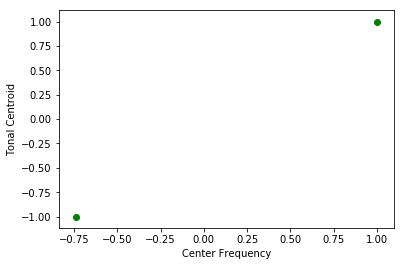

In [23]:
plt.scatter(afeat_feat[:2,1], afeat_feat[:2,2], c='g')
plt.xlabel('Center Frequency')
plt.ylabel('Tonal Centroid')

In [24]:
model = sklearn.cluster.AffinityPropagation()
labels = model.fit_predict(afeat_feat)
print(labels)

[0 1 1 0 1]


In [43]:
## MOdel

In [46]:
model = keras.Sequential()

In [47]:
model.fit(feature_table)

RuntimeError: You must compile your model before using it.